# Apprentissage Statistique / Machine

In [9]:
!python3 -m pip install sklearn  # specifically Python 3.4

  Using cached https://files.pythonhosted.org/packages/1e/7a/dbb3be0ce9bd5c8b7e3d87328e79063f8b263b2b1bfa4774cb1147bfcd3f/sklearn-0.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/f5/ef/bcd79e8d59250d6e8478eb1290dc6e05be42b3be8a86e3954146adbc171a/scikit_learn-0.24.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c8/89/63171228d5ced148f5ced50305c89e8576ffc695a90b58fe5bb602b910c2/scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 307kB 2.9MB/s eta 0:00:01
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /home/baptiste/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
%matplotlib inline
digits = datasets.load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

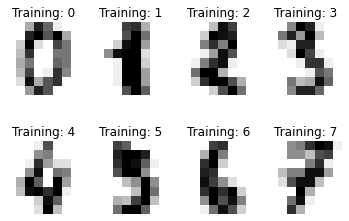

In [6]:
images_and_labels = list(zip(digits.images, 
   digits.target))
for index, (image, label) in  enumerate(images_and_labels[:8]):
     plt.subplot(2, 4, index + 1)
     plt.axis('off')
     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
     plt.title('Training: %i' % label)

In [7]:
X=digits.data
y=digits.target

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=11)

In [9]:
X_train,X_test,y_train,y_test

(array([[ 0.,  0.,  3., ..., 12., 14.,  7.],
        [ 0.,  1.,  9., ..., 10.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ..., 16., 13.,  1.],
        [ 0.,  1., 11., ..., 13., 16.,  5.],
        [ 0.,  0.,  6., ...,  6.,  0.,  0.]]),
 array([[ 0.,  0.,  7., ...,  3.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  1., 13., ..., 15.,  3.,  0.],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ..., 12.,  0.,  0.]]),
 array([2, 9, 7, ..., 6, 2, 3]),
 array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6, 9, 6,
        0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5, 3, 0, 5, 7, 3, 9, 6, 5,
        5, 8, 8, 1, 1, 2, 4, 9, 5, 6, 9, 2, 1, 8, 5, 3, 2, 7, 9, 6, 3, 7,
        4, 2, 0, 1, 0, 2, 7, 3, 5, 1, 8, 7, 7, 2, 0, 6, 6, 4, 6, 8, 3, 7,
        4, 1, 9, 3, 5, 4, 0, 3, 1, 3, 3, 1, 2, 8, 5, 0, 1, 7, 2, 1, 3, 3,
        7, 4, 0, 2, 9, 0, 4

In [10]:
df=pd.read_csv('../data/titanic-train.csv',skiprows=1,header=None,usecols=[1,2,4,5,9,11],
  names=["Surv","Classe","Genre","Age","Prix","Port"],dtype={"Surv":object,"Classe":object,"Genre":object,"Port":object})
df.head()

,Surv,Classe,Genre,Age,Prix,Port
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [12]:
# Redéfinir les types 
df["Surv"]=pd.Categorical(df["Surv"],ordered=False)
df["Classe"]=pd.Categorical(df["Classe"],ordered=False)
df["Genre"]=pd.Categorical(df["Genre"],ordered=False)
df["Port"]=pd.Categorical(df["Port"],ordered=False)
df.dtypes, df.shape

(Surv      category
 Classe    category
 Genre     category
 Age        float64
 Prix       float64
 Port      category
 dtype: object,
 (891, 6))

In [13]:
df.count()

Surv      891
Classe    891
Genre     891
Age       714
Prix      891
Port      889
dtype: int64

In [17]:
df["Age"]=df["Age"].fillna(df["Age"].median())
df.Port=df["Port"].fillna("S")

ValueError: fill value must be in categories

In [15]:
# Discrétiser les variables quantitatives
df["AgeQ"]=pd.qcut(df.Age,3,labels=["Ag1","Ag2","Ag3"])
df["PrixQ"]=pd.qcut(df.Prix,3,labels=["Pr1","Pr2","Pr3"])
# redéfinir les noms des modalités 
df["Surv"]=df["Surv"].cat.rename_categories(["Vnon","Voui"])
df["Classe"]=df["Classe"].cat.rename_categories(["Cl1","Cl2","Cl3"])
df["Genre"]=df["Genre"].cat.rename_categories(["Gfem","Gmas"])
df["Port"]=df["Port"].cat.rename_categories(["Pc","Pq","Ps"])
df.head()

,Surv,Classe,Genre,Age,Prix,Port,AgeQ,PrixQ
0,Vnon,Cl3,Gmas,22.0,7.2500,Ps,Ag1,Pr1
1,Voui,Cl1,Gfem,38.0,71.2833,Pc,Ag3,Pr3
2,Voui,Cl3,Gfem,26.0,7.9250,Ps,Ag2,Pr1
3,Voui,Cl1,Gfem,35.0,53.1000,Ps,Ag3,Pr3
4,Vnon,Cl3,Gmas,35.0,8.0500,Ps,Ag3,Pr1


In [16]:
df.count()

Surv      891
Classe    891
Genre     891
Age       891
Prix      891
Port      891
AgeQ      891
PrixQ     891
dtype: int64